Simple 1D bar problem
-------------------------------

Let's define a the eigenvalue problem for a 5 dofs bar:

* Bar
$$
\mathbf{K_p} =
\begin{bmatrix}
2 & -1 & 0 & 0 & 0  \\
-1 & 2 & -1 & 0 & 0  \\
0 & -1 & 2 & -1 & 0  \\
0 & 0 & -1 & 2 & -1  \\
0 & 2 & 0 & -1 & 2  
\end{bmatrix}
$$

$$
\mathbf{M_p} =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0  \\
0 & 2 & 0 & 0 & 0  \\
0 & 0 & 2 & 0 & 0  \\
0 & 0 & 0 & 2 & 0  \\
0 & 0 & 0 & 0 & 1  
\end{bmatrix}
$$

Thus, the eigenvalue problem can be written as:

$$
\mathbf{K_p} \mathbf{\phi} = \lambda \mathbf{M_p}\mathbf{\phi} \\
$$


Let's decompose the previous domain in 2 domains defined by the following matrices:

* Bar 1
$$
\mathbf{K_1} =
\begin{bmatrix}
2 & -1 & 0 \\
1 & 2 & -1 \\
0 & -1 & 1
\end{bmatrix}
$$

$$
\mathbf{B_1} =
\begin{bmatrix}
0 & 0 & 1
\end{bmatrix}
$$

$$
\mathbf{M_1} =
\begin{bmatrix}
1 & 0 & 0  \\
0 & 2 & 0  \\
0 & 0 & 1   \\
\end{bmatrix}
$$

* Bar 2
$$
\mathbf{K_2} =
\begin{bmatrix}
1 & -1 & 0 \\
1 & 2 & -1 \\
0 & -1 & 2
\end{bmatrix}
$$

$$
\mathbf{B_2} =
\begin{bmatrix}
-1 & 0 & 0
\end{bmatrix}
$$



$$
\mathbf{M_2} =
\begin{bmatrix}
1 & 0 & 0  \\
0 & 2 & 0  \\
0 & 0 & 1   \\
\end{bmatrix}
$$

These matrices discrebe two bars, where Bar 1 is fixed in the left and the Bar 2 fixed in the right.

The eigenvalue problem can be written as:

$$
\begin{bmatrix}
\mathbf{K1} & \mathbf{0}  \\
\mathbf{0} & \mathbf{K2}   \\  
\end{bmatrix}
\begin{bmatrix}
\phi_1 \\
\phi_2 \\  
\end{bmatrix}
= 
\lambda
\begin{bmatrix}
\mathbf{M1} & \mathbf{0}  \\
\mathbf{0} & \mathbf{M2}   \\  
\end{bmatrix}
\begin{bmatrix}
\phi_1 \\
\phi_2 \\  
\end{bmatrix}
$$

We must introduce the compatibility contraints between these two bars, such that:


$$
\mathbf{B_1} \mathbf{\phi_1} + \mathbf{B_2} \mathbf{\phi_2} = \mathbf{0} \\
$$

Then, we can write the hybrid problem as:

$$
\begin{bmatrix}
\mathbf{K} &  \mathbf{B^T}  \\
\mathbf{B} & \mathbf{0}
\end{bmatrix}
\begin{bmatrix}
\mathbf{\phi_u}  \\
\mathbf{\phi_{\lambda}}
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{M} & \mathbf{0}  \\
\mathbf{0} & \mathbf{0}   \\  
\end{bmatrix}
\begin{bmatrix}
\mathbf{\phi_u}  \\
\mathbf{\phi_{\lambda}}
\end{bmatrix}
$$

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.sparse import linalg
from scipy.sparse import coo_matrix, csc_matrix, bmat, hstack, vstack, linalg
from pyfeti.src.feti_solver import SerialFETIsolver 
from pyfeti.src.linalg import ProjLinearSys, DualLinearSys

# A simple example with Positive Define Domains
Kp = np.array([[ 2, -1, 0., 0, 0.],
               [-1, 2.,-1, 0., 0.],
               [0.,-1., 2.,-1., 0.],
               [0, 0.,-1, 2., -1.],
               [0., 0.,0., -1., 2.]])

Mp = np.array([[ 1, 0., 0., 0, 0.],
               [0., 2.,0., 0., 0.],
               [0.,0., 2.,0., 0.],
               [0, 0.,0., 2., 0.],
               [0., 0.,0., 0., 1.]])


In [2]:
eigvalues, V = scipy.linalg.eigh(Kp,b=Mp)
eigvalues

array([0.14536232, 0.6339746 , 1.40303172, 2.3660254 , 2.45160596])

In [3]:
import numpy as np
from scipy.sparse import linalg
from scipy.sparse import coo_matrix, bmat, hstack, vstack, linalg
from pyfeti.src.feti_solver import SerialFETIsolver


# A simple example with Positive Define Domains
K1 = np.array([[2.,-1, 0.],
               [-1,2.,-1.],
               [0.,-1.,1.]])

K2 = np.array([[1.,-1.,0.],
               [-1,2.,-1.],
               [0.,-1.,2.]])

M1 = np.array([[1.,0., 0.],
               [0.,2.,0.],
               [0.,0.,1.]])

M2 = np.array([[1.,0., 0.],
               [0.,2.,0.],
               [0.,0.,1.]])


B1 = np.array([[0,0,1]]) 
B2 = np.array([[-1,0,0]]) 
               
               

    
K = bmat([[K1,None],[None,K2]])
M = bmat([[M1,None],[None,M2]])
B = np.bmat([B1,B2]).A
nc, ndof = B.shape


A = bmat([[K,B.T],[B,None]]).A
Mdual = bmat([[M,0*B.T],[0*B,None]]).A
BBTinv = np.linalg.inv(B.dot(B.T))
P = np.eye(ndof) - B.T.dot(BBTinv.dot(B))

In [4]:
#omega_dual_2, V_dual = scipy.linalg.eigh(A,b=Mdual)

In [5]:
np.linalg.inv(A)

array([[ 0.83333333,  0.66666667,  0.5       ,  0.5       ,  0.33333333,
         0.16666667,  0.16666667],
       [ 0.66666667,  1.33333333,  1.        ,  1.        ,  0.66666667,
         0.33333333,  0.33333333],
       [ 0.5       ,  1.        ,  1.5       ,  1.5       ,  1.        ,
         0.5       ,  0.5       ],
       [ 0.5       ,  1.        ,  1.5       ,  1.5       ,  1.        ,
         0.5       , -0.5       ],
       [ 0.33333333,  0.66666667,  1.        ,  1.        ,  1.33333333,
         0.66666667, -0.33333333],
       [ 0.16666667,  0.33333333,  0.5       ,  0.5       ,  0.66666667,
         0.83333333, -0.16666667],
       [ 0.16666667,  0.33333333,  0.5       , -0.5       , -0.33333333,
        -0.16666667, -0.16666667]])

In [6]:
D = np.linalg.inv(A).dot(Mdual)
r = np.random.rand(A.shape[0]-1)
v0= P.dot(r/np.linalg.norm(r))
v0 = np.concatenate([v0,np.array([.0])])


In [7]:
omega_dual_2, V_dual = linalg.eigsh(D,v0=v0,k=5)

In [8]:
dual_eig = np.sort(1./omega_dual_2)
dual_eig 

array([0.14459994, 0.54222882, 1.38289967, 2.460947  , 2.76389764])

In [9]:
eigvalues

array([0.14536232, 0.6339746 , 1.40303172, 2.3660254 , 2.45160596])

Text(0, 0.5, 'Dual eigenvalues')

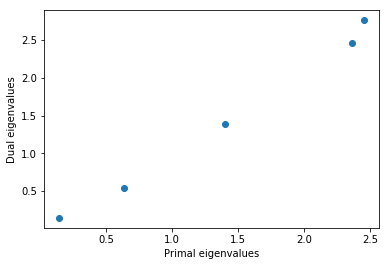

In [10]:
plt.plot(eigvalues[:5],dual_eig[:5],'o')
plt.xlabel('Primal eigenvalues')
plt.ylabel('Dual eigenvalues')


In [11]:
def power_iteration(A, b =None, max_nint=500,tol=1e-12):
    ''' Computer a power iteration for a matrix A or a Linear
    Operator
        parameters
            A
            b
            max_int
            tol
    returns
        b_k : np.array
            the biggest eigenvector of A
    '''
   
    if b is None:
        b_k = np.random.rand(A.shape[1])
    else:
        b_k = b
        
    for i in range(max_nint):
        # calculate the matrix-by-vector product Ab
        b_k1 = A.dot(b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)
        
        if np.linalg.norm(b_k1 - b_k)<tol:
            b_k = b_k1 / b_k1_norm
            print('Power has conveged after %i' %i)
            break
        
        # re normalize the vector
        b_k = b_k1 / b_k1_norm
        

    return b_k

def is_eigvec(A,vec,M=None,tol=1.0e-6,show=True):
    ''' check is a vec is a eigenvector of A or
    a eigenvector of Ax = lambdaMx
    
    paramters:
        A : np.array
            right hand side matrix of the eigenvalue problem
        vec : np.array
            eigenvector to be tested
        M : np.array
            left hand side of the generalized eigenvalue problem
        tol : float
            tolerante in the norm difference between vector 
        show : Boolen
            print norm on the screen
            
    returns:
        Boolean
            True : if is vec is eigenvector
            Flase : if s vec is not eigenvector
    '''
    
    ndof = len(vec)
    if M is None:
        M = np.eye(ndof)
    
    vec1 = np.array(M.dot(vec)).flatten()
    vec2 = np.array(A.dot(vec)).flatten()
    
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    unit_vec1 = vec1/norm_vec1
    unit_vec2 = vec2/norm_vec2

    norm_dif = np.linalg.norm(unit_vec1 - unit_vec2)
    if show:
        print('The L2 norm of the vectors ||(v2/||v2|| - v1/|| v1 ||)|| where A*v=scale*M*v , v1= scale * v2 is %f' %norm_dif)
    if norm_dif>tol:
        return False
    else:
        return True    



In [12]:
#Power eigenvalue
v_k = power_iteration(D,tol=1)
eigval = np.linalg.norm(D.dot(v_k))
1/eigval

0.1453623202815386

In [13]:
obj = ProjLinearSys(K,M,P,solver_tol=1.0E-12)
S = linalg.LinearOperator(shape=K.shape,matvec= lambda x : obj.solve(x))

In [14]:
omega_dual_2, V_dual = linalg.eigsh(S,k=5)

In [15]:
dual_eig = np.sort(1./omega_dual_2)
dual_eig 

array([-3.01562175,  0.13410042,  0.62193571,  1.38211198,  2.46187196])

In [16]:
eigvalues

array([0.14536232, 0.6339746 , 1.40303172, 2.3660254 , 2.45160596])

Text(0, 0.5, 'Dual eigenvalues')

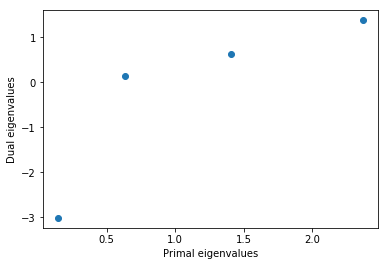

In [17]:
plt.plot(eigvalues[:4],dual_eig[:4],'o')
plt.xlabel('Primal eigenvalues')
plt.ylabel('Dual eigenvalues')

In [21]:
dual_obj = DualLinearSys(csc_matrix(A),csc_matrix(Mdual),nc,projection=csc_matrix(P))
Ddual = dual_obj.getLinearOperator()

In [22]:
omega_dual_2, V_dual = linalg.eigsh(Ddual,k=5,v0=v0)

In [23]:
omega_dual_2

array([0.3618079 , 0.40634764, 0.72311826, 1.84423986, 6.91563219])

In [24]:
V_dual

array([[ 6.73026365e-01,  3.34965891e-01, -4.09028590e-01,
         7.75679742e-02, -2.36007946e-01],
       [-7.24643597e-02, -3.63288518e-01, -4.12646431e-01,
         6.31421708e-01, -4.31113762e-01],
       [ 4.90495487e-02,  1.51588433e-01,  4.63975120e-01,
         3.13896904e-02, -5.07046013e-01],
       [ 4.90495487e-02,  1.51588433e-01,  4.63975120e-01,
         3.13896904e-02, -5.07046013e-01],
       [-1.44487204e-01, -5.26013795e-01, -2.25944652e-01,
        -6.19683740e-01, -4.35838835e-01],
       [-4.89810748e-01,  6.56959767e-01, -4.19031063e-01,
        -2.25094485e-01, -2.33011082e-01],
       [-5.25529820e-01,  3.96806068e-02,  7.23511841e-02,
         3.98301074e-01, -4.48073917e-04]])